In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('AirPassengers.csv')
df.columns = ['Date', 'Passengers']
df.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Plot the data

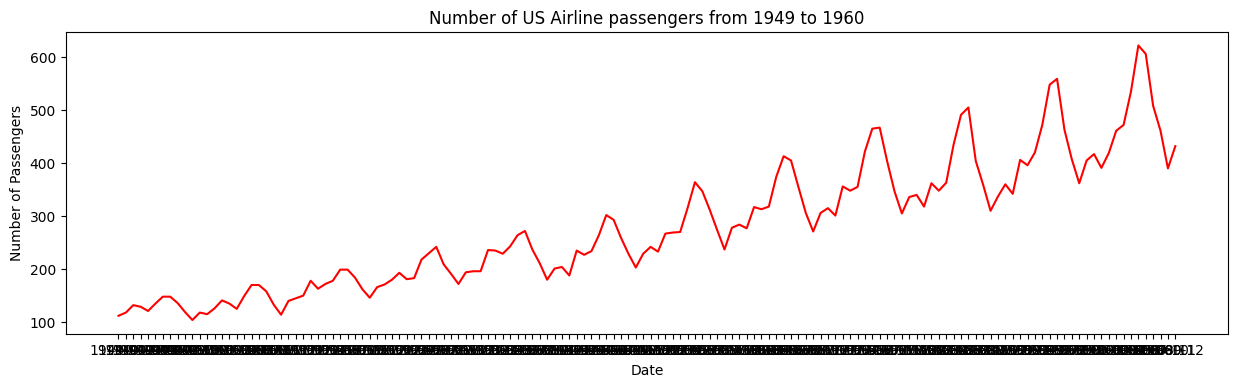

In [5]:
def plot_df(df, x, y, title='', xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='r')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['Passengers'], title='Number of US Airline passengers from 1949 to 1960')

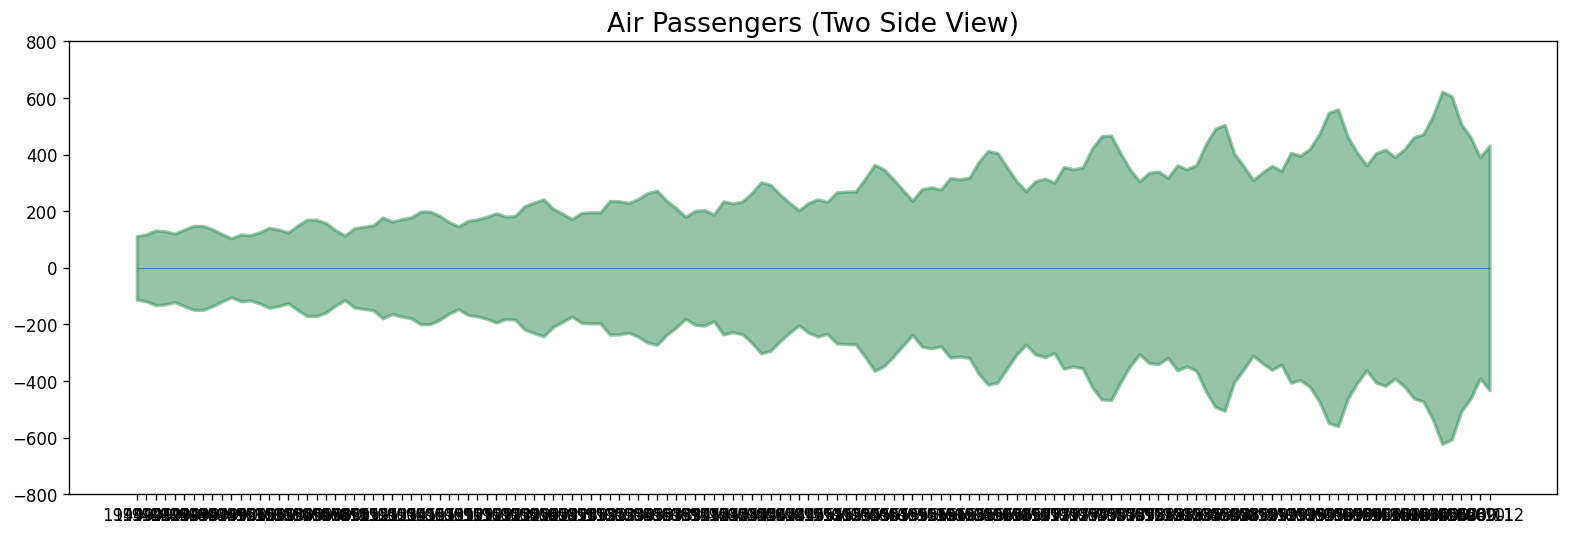

In [12]:
x = df.Date.values
y1 = df.Passengers.values

#Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=0.5)
plt.show()

## Multiplicative and Additive Decomposition

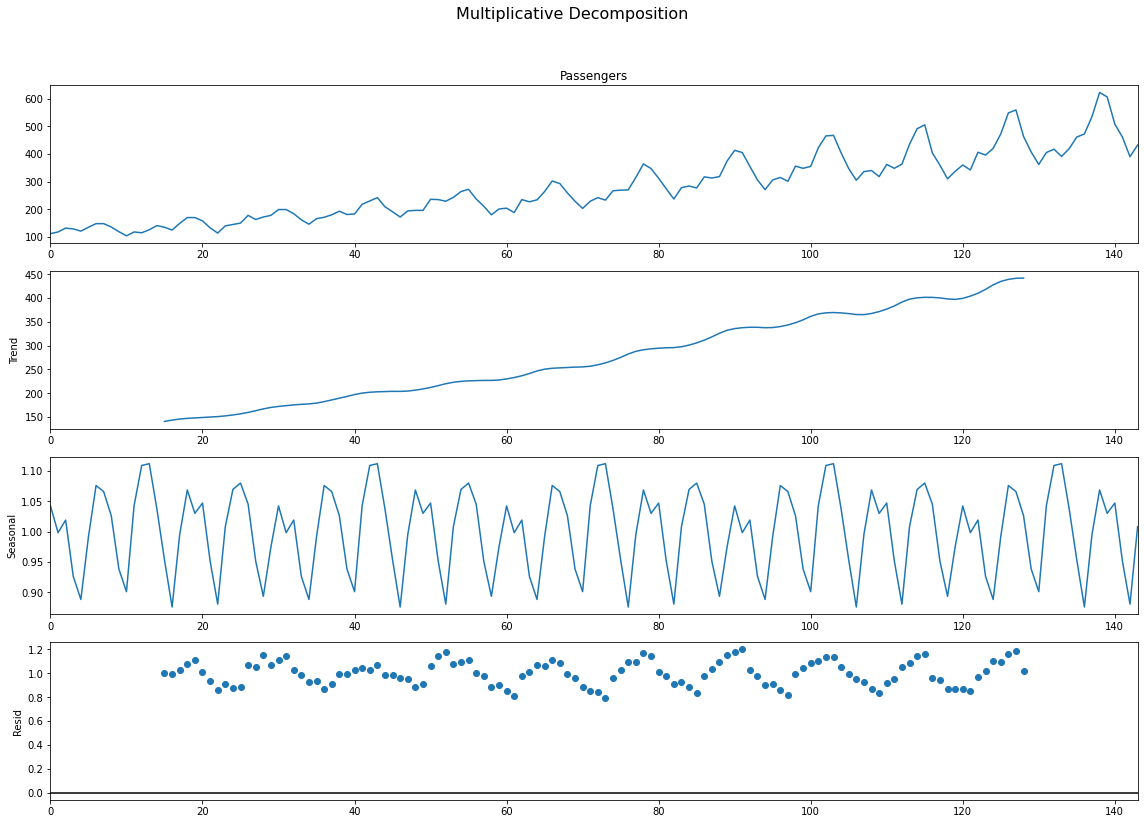

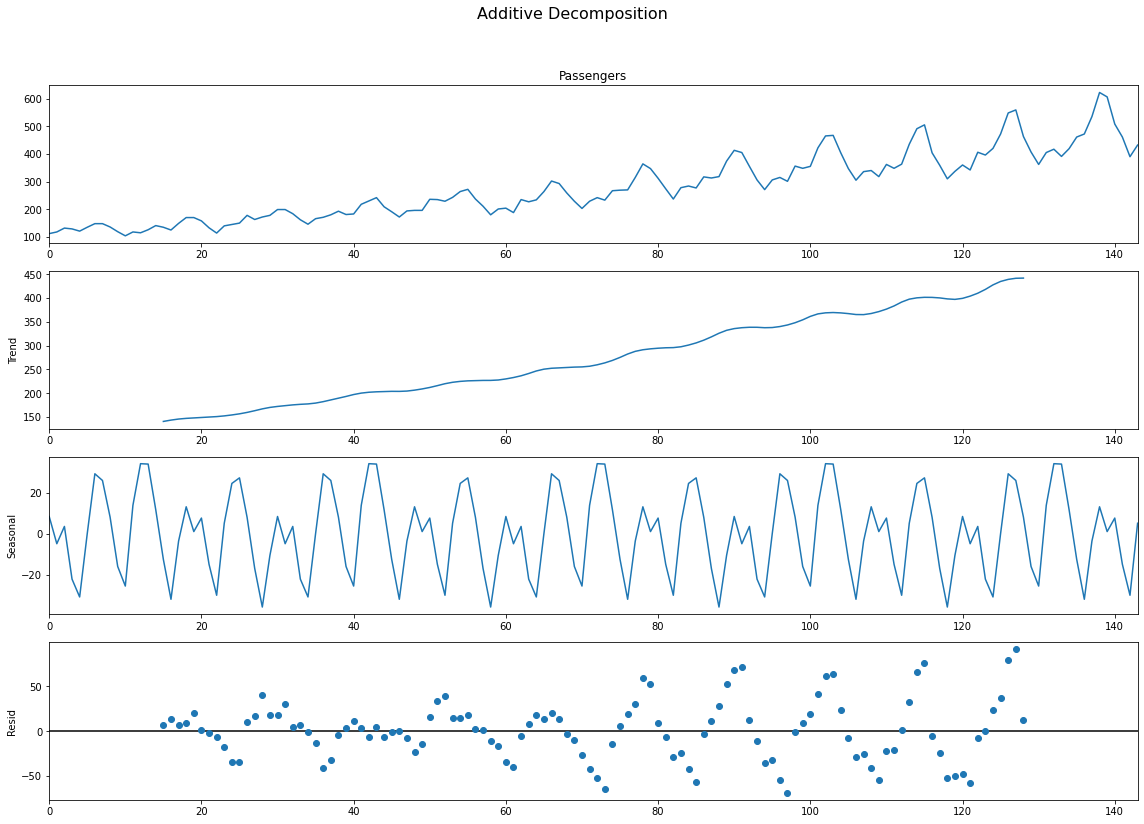

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df.Passengers, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df.Passengers, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## White Noise

<AxesSubplot:title={'center':'Random White Noise'}>

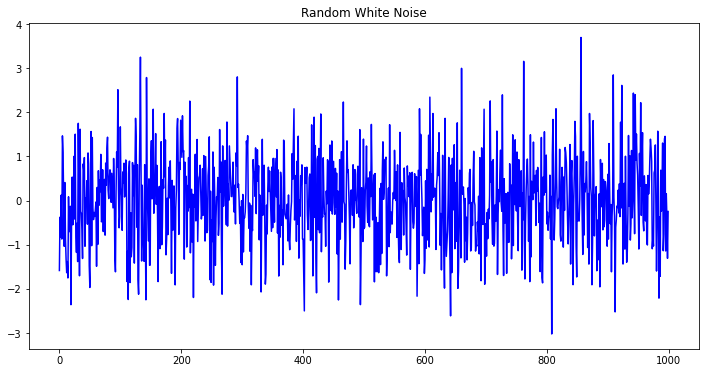

In [19]:
# White Noise (sequence of random numbers with mean 0)
plt.rcParams.update({'figure.figsize':(12,6)})
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

## Detrend a Time Series

#### Using scipy: Subtract the line of best fit

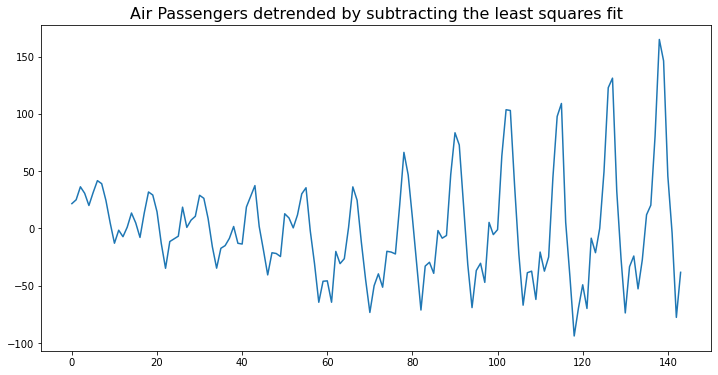

In [21]:
from scipy import signal
detrended = signal.detrend(df.Passengers.values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)
plt.show()

#### Using statmodels: Subtracting the Trend Component

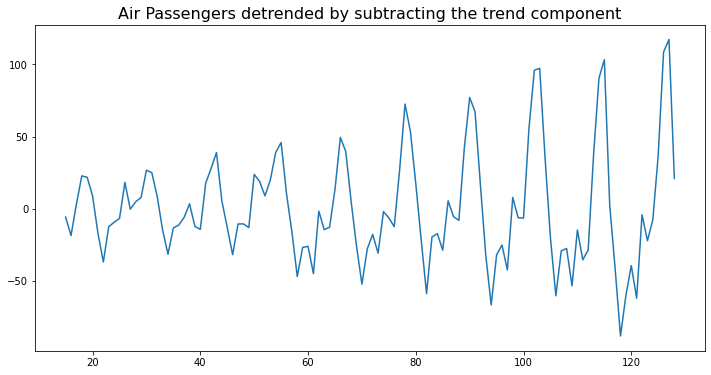

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df.Passengers, model='multiplicative', period=30)
detrended = df.Passengers.values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
plt.show()

## Deseasonalize a Time Series

#### Subtracting the Trend Component

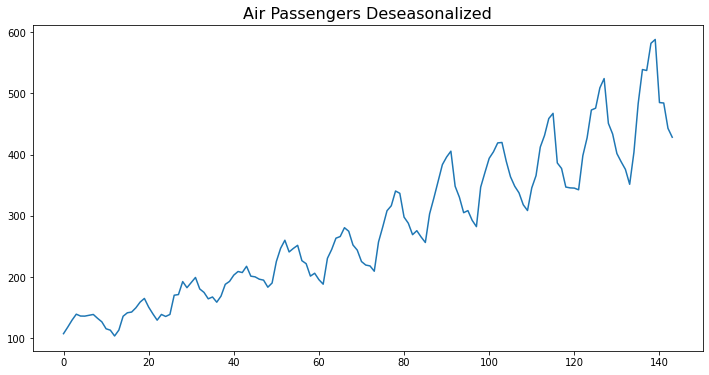

In [24]:
# Time Series Decomposition
result_mul = seasonal_decompose(df.Passengers, model='multiplicative', period=30)

# Deseasonalize
desesonalized = df.Passengers.values / result_mul.seasonal

# Plot
plt.plot(desesonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.show()

## Test for seasonality

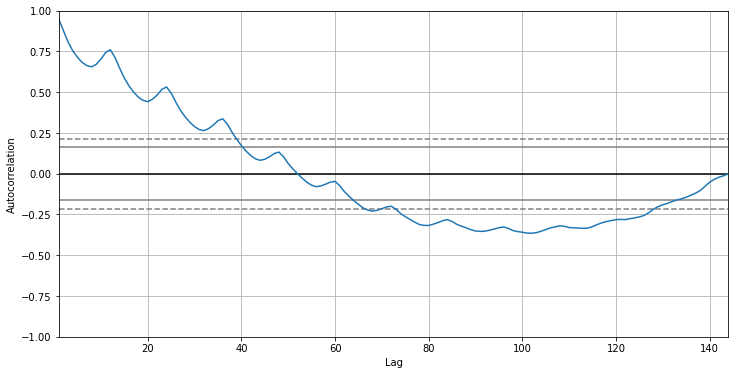

In [26]:
from pandas.plotting import autocorrelation_plot

# Draw plot
autocorrelation_plot(df.Passengers.tolist())
plt.show()

## Autocorrelation and Partial Autocorrelation Functions

c:\Users\hasan\anaconda3\envs\DataScience\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


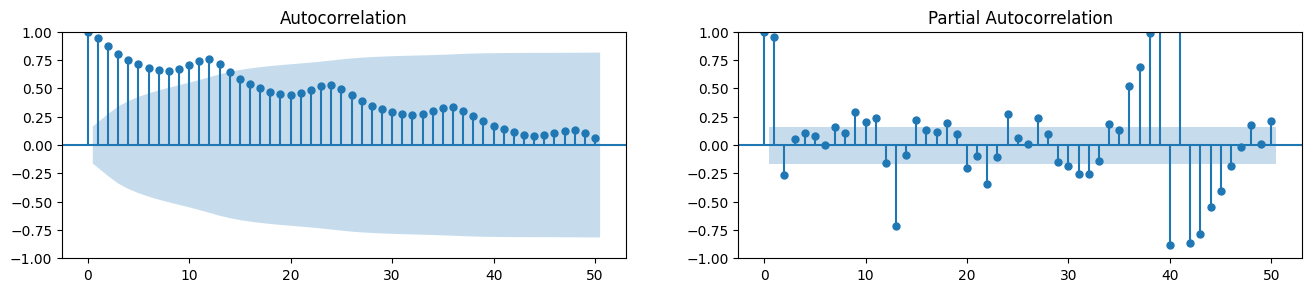

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(df.Passengers.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Passengers.tolist(), lags=50, ax=axes[1])

plt.show()

## Lag plots

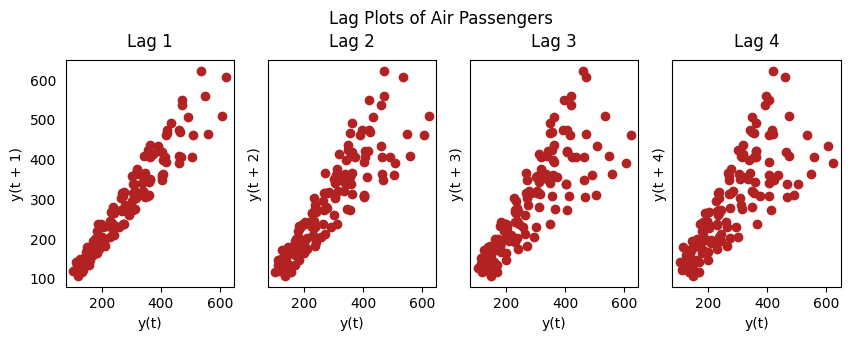

In [31]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()